In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv("/content/insurance (1).csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Eda


In [6]:
df.shape

(1338, 7)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# df.describe()
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
# df.isnull().sum()
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

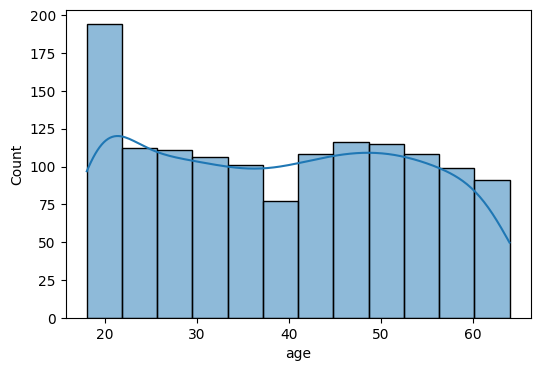

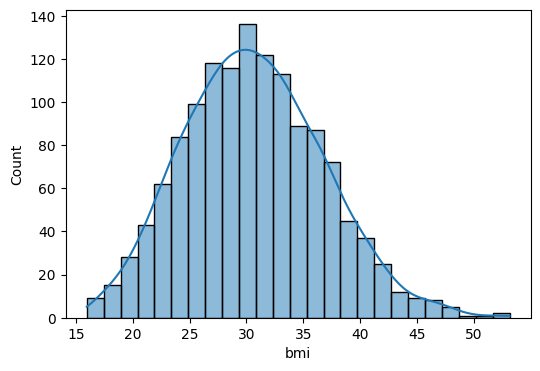

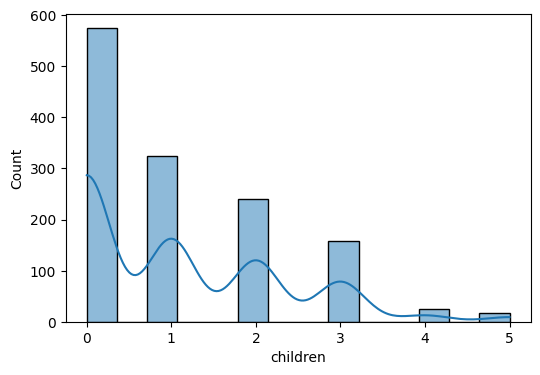

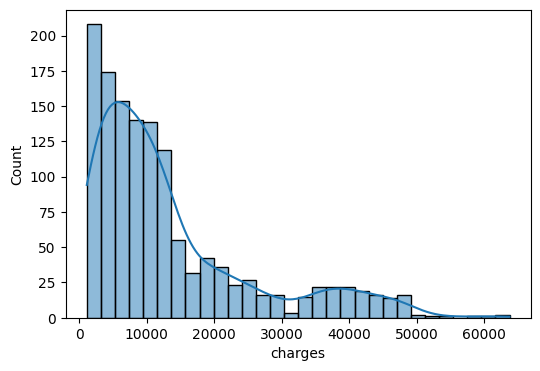

In [12]:
# numeric_columns=['age','bmi','children','charges']

# for col in numeric_columns:

#     plt.figure(figsize=(6,4))
#     sns.histplot(x=df[col],kde=True)

numeric_col=['age','bmi','children','charges']
for col in numeric_col:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True)

we can see from figures that in the age distrivution a out of 1668 people more 160 people are   people of age 20 or younger .



vmi is very good no it is a normal distrivution or guassian curve  we can conclude all data is correct



children is a categorical feature

as for charges we know that to do insurance if you have less age or you are younger less charges will ve applied to that person and we can clearly see that in graph also that less charges are applied to the people of younger age as per couunt also  a right skewed distrivution

<Axes: xlabel='children', ylabel='count'>

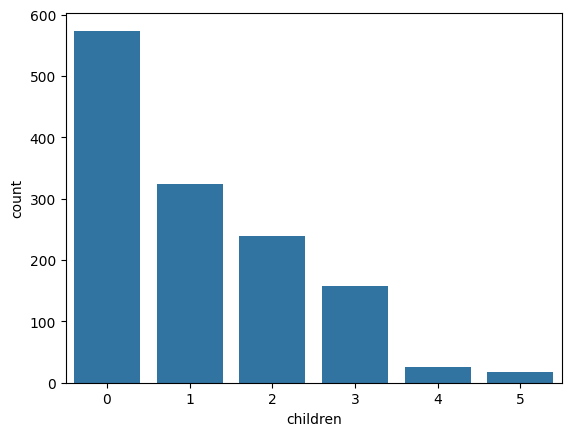

In [13]:
# sns.countplot(x=df['children'])
sns.countplot(x=df['children'])

conclusion is that more than 550 0r more pople have 0 children so 0 children meaning low charges during insurance

<Axes: xlabel='sex', ylabel='count'>

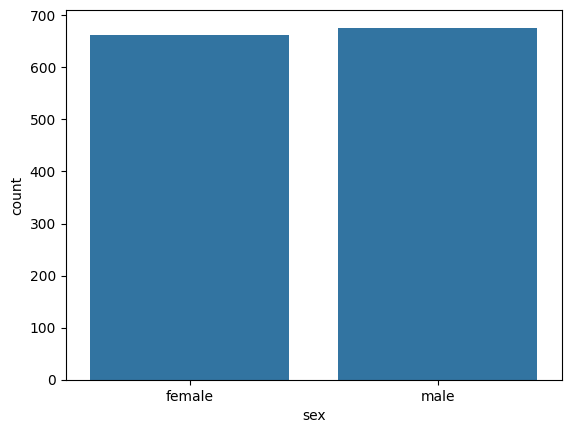

In [14]:
# sns.countplot(x=df['sex'])
sns.countplot(x=df['sex'])

voth are equal we will see

<Axes: xlabel='smoker', ylabel='count'>

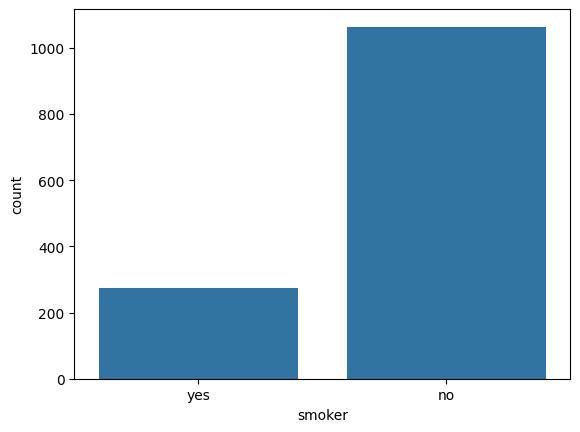

In [15]:
sns.countplot(x=df['smoker'])


<Axes: xlabel='smoker', ylabel='count'>

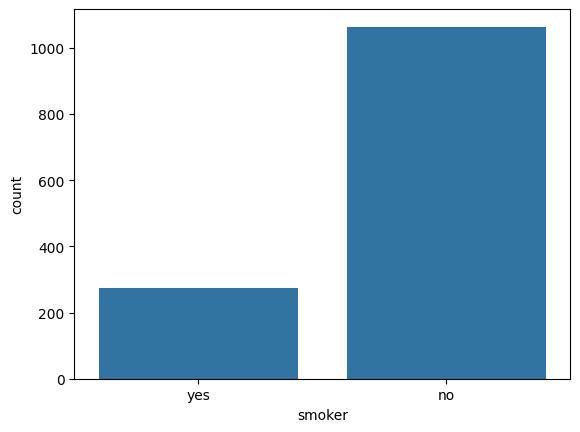

In [ ]:
sns.countplot(x=df['smoker'])

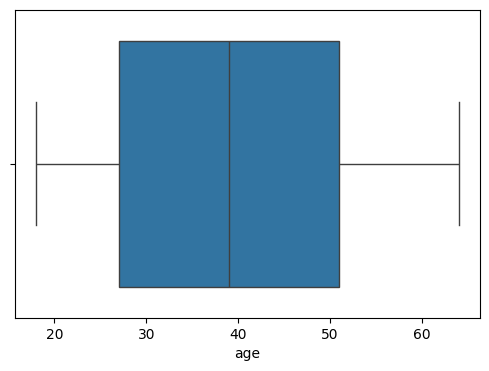

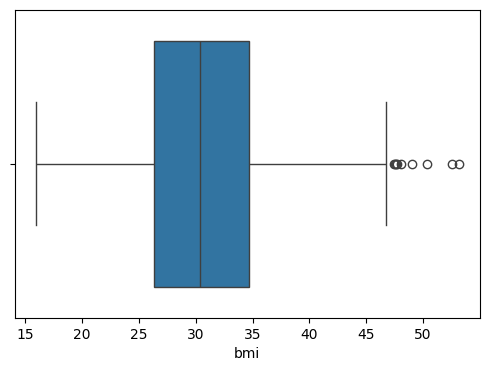

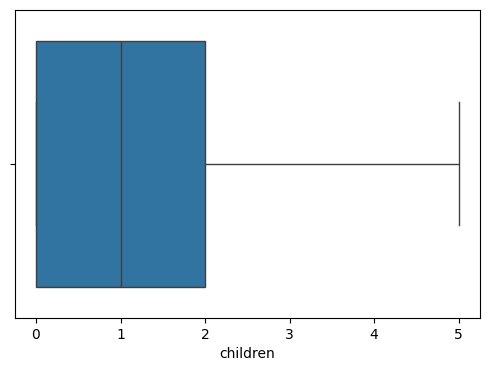

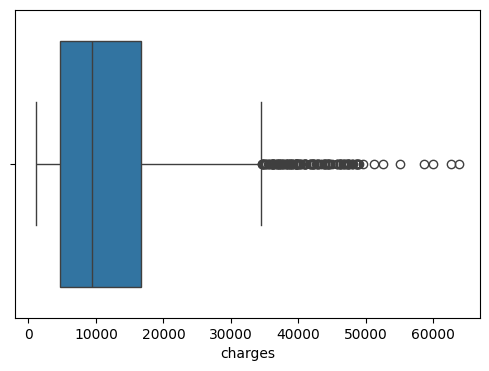

In [17]:
# for col in numeric_columns:
#   plt.figure(figsize=(6,4))
#   sns.boxplot(x=df[col])

# checking for the outliers for nmeric vvalues oviously
for col in numeric_col:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[col])

most of the outliers are on the charges

<Axes: >

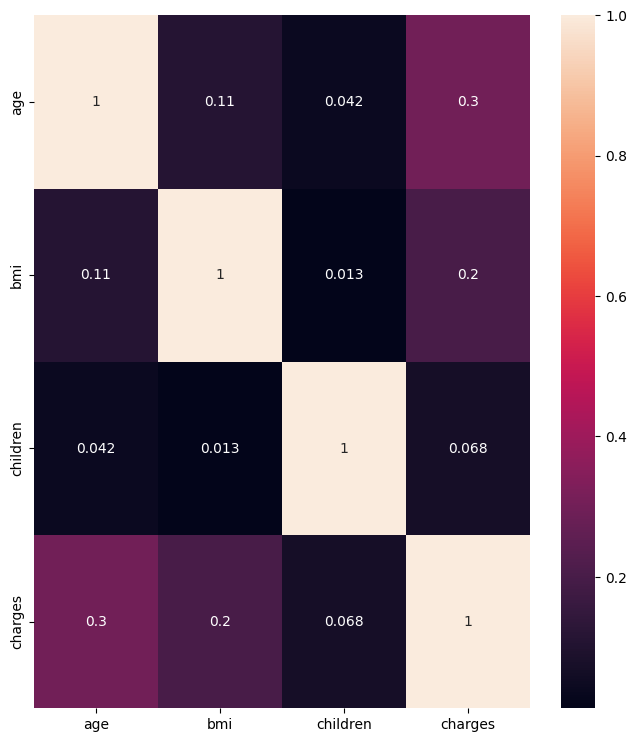

In [19]:
from pandas.core.arrays import numeric
# plt.figure(figsize=(8,6))
# corrr=df.corr(numeric_only=True)
# sns.heatmap(corrr,annot=True)  annot means value of corr

corr=df.corr(numeric_only=True)
plt.figure(figsize=(8,9))
sns.heatmap(corr,annot=True)



we can see that how all features are correlated with each other

we can see that age is highly correlated with charges (which our output variavle )  and age , vmi are highly correlated with charges .

#data cleaning and preprocessing

In [21]:
# all done reasearch karo
df_clean=df.copy()
df_clean

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# df_cleaned=df.copy()

In [22]:
df_clean

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [23]:
# df_cleaned.shape
df_clean.shape

(1338, 7)

In [24]:
# df_cleaned.drop_duplicates(inplace=True)
df_clean.drop_duplicates(inplace=True)

In [26]:
# df_cleaned.shape
df_clean.shape

(1337, 7)

In [27]:
# df_cleaned.isnull().sum()
df_clean.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [28]:
# df_cleaned.dtypes
df_clean.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


conerting ovkect to numeric

In [29]:
# df_cleaned['sex'].value_counts()
df_clean['sex'].value_counts()

,count
sex,
male,675
female,662


In [30]:
df_clean['sex']=df_clean['sex'].map({"male":0,"female":1})

In [31]:
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


lavel encoding for sex

In [ ]:
# df_cleaned['sex']=df_cleaned['sex'].map({"male":0 ,"female":1})

In [32]:
# df_cleaned.head()

In [33]:
# df_cleaned['smoker'].value_counts()

df_clean['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [34]:
df_clean['smoker']=df_clean['smoker'].map({"no":0 ,"yes":1})

In [35]:
df_clean

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [ ]:
# df_cleaned['smoker']=df_cleaned['smoker'].map({"no":0 ,"yes":1})

In [36]:
# df_cleaned.head()
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [38]:
df_clean.rename(columns={
    "sex":"is_female",
    "smoker":"is_smoker",
},inplace=True)

In [ ]:
# df_cleaned.rename(columns={
#     "sex":"is_female",
#     "smoker":"is_smoker"
# },inplace=True)

In [40]:
# df_cleaned.head()
df_clean.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


for region encoding since  we have multiple options so we use one hot encoding

In [42]:
df_clean=pd.get_dummies(df_clean,columns=['region'],drop_first=True)

In [ ]:

# df_cleaned=pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)   #getdummies ma df_cleaned halney
# ani kun column ko dummy tyo specify garney ani tyo region lai drop garney kinaki dummy make garda
#tyo diyeko column pani linxa dummy ley so

In [43]:
# df_cleaned.head()
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [44]:
# df_cleaned=df_cleaned.astype(int)
df_clean=df_clean.astype(int)

In [45]:
# df_cleaned.head()
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


##feature engineering and extraction

<Axes: xlabel='bmi', ylabel='Count'>

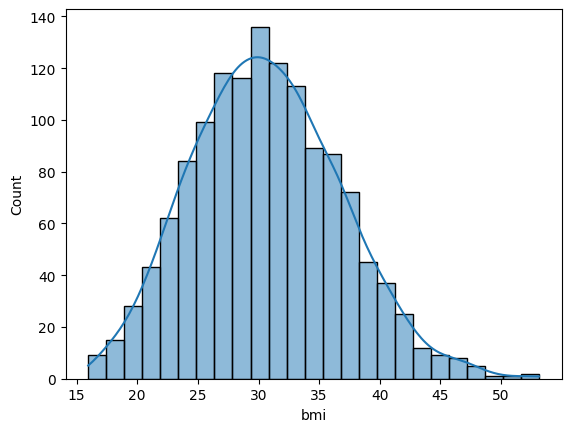

In [49]:
sns.histplot(df['bmi'],kde=True)

<Axes: xlabel='bmi', ylabel='Count'>

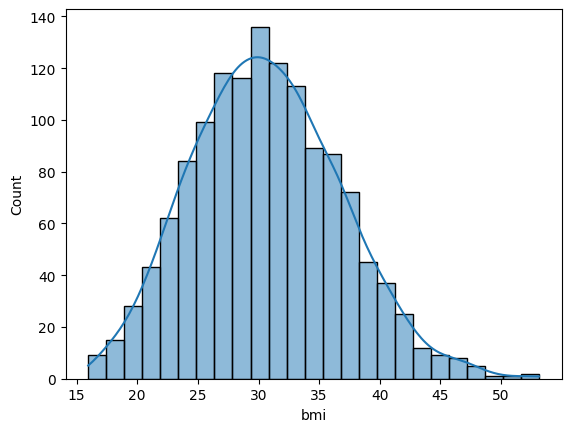

In [ ]:
# sns.histplot(df['bmi'],kde=True)

In [50]:
# feature engineering
df_clean['vmi_category']=pd.cut(
    df_clean['bmi'],
    bins=[0 ,18.5 ,24.9 , 29.9 ,float('inf')],    #inf  is infinity
    labels=['underweight','normal','overweight','ovese']
)

In [ ]:
# df_cleaned['bmi_category']=pd.cut(
#     df_cleaned['bmi'],
#     bins=[0, 18.5 , 24.9 ,29.9,float('inf')],
#     labels=['underweiht','normal','overwight','obese']
# )


In [51]:
# df_cleaned.head(10)
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,vmi_category
0,19,1,27,0,1,16884,0,0,1,overweight
1,18,0,33,1,0,1725,0,1,0,ovese
2,28,0,33,3,0,4449,0,1,0,ovese
3,33,0,22,0,0,21984,1,0,0,normal
4,32,0,28,0,0,3866,1,0,0,overweight


In [53]:
df_clean=pd.get_dummies(df_clean,columns=['vmi_category'],drop_first=True)

In [ ]:
# df_cleaned=pd.get_dummies(df_cleaned,columns=['bmi_category'],drop_first=True)
# df_clean=pd.get_dummies(df_clean,columns=['vmi_category'],drop_first=True)

In [54]:
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,vmi_category_normal,vmi_category_overweight,vmi_category_ovese
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,False,False,True
1334,18,1,31,0,0,2205,0,0,0,False,False,True
1335,18,1,36,0,0,1629,0,1,0,False,False,True
1336,21,1,25,0,0,2007,0,0,1,False,True,False


In [55]:
df_clean.astype(int)

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,vmi_category_normal,vmi_category_overweight,vmi_category_ovese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


In [ ]:
# df_cleaned.astype(int)

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_normal,bmi_category_overwight,bmi_category_obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


feature scaling


In [56]:
# df_cleaned.columns
df_clean.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'vmi_category_normal', 'vmi_category_overweight', 'vmi_category_ovese'],
      dtype='object')

In [57]:
from sklearn.preprocessing import StandardScaler


#standaraization scaling values vetween -3 to 3 using standard deviation
#to concert it to normal distrivution curve

In [59]:
# cols=['age','bmi','children']
# scaler=StandardScaler()
# df_cleaned[cols]=scaler.fit_transform(df_cleaned[cols])

col=['age','children','bmi']
scaler=StandardScaler()
df_clean[col]=scaler.fit_transform(df_clean[col])

In [60]:
# df_cleaned.head()
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,vmi_category_normal,vmi_category_overweight,vmi_category_ovese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,False,True,False
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,False,False,True
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,False,False,True
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,True,False,False
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,False,True,False


##feature extraction

In [ ]:
#taking major feature

##which feature is more correlated to charges(output variavle)

In [62]:
#using scipy livrary
# df_cleaned.columns
df_clean.columns



Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'vmi_category_normal', 'vmi_category_overweight', 'vmi_category_ovese'],
      dtype='object')

In [65]:
# from scipy.stats import pearsonr
from scipy.stats import pearsonr

#---------pearson correlation calculation-------
#---------list of features---------
selected_feature=[
    'age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'vmi_category_normal', 'vmi_category_overweight', 'vmi_category_ovese'
]
correlations = {
    feature: pearsonr(df_clean[feature], df_clean['charges'])[0]
    for feature in selected_feature
}
correlation_df=pd.DataFrame(list(correlations.items()),columns=['feature','pearson correlations'])
correlation_df.sort_values(by='pearson correlations',ascending=False)
# correlations = {
#     feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
#     for feature in selected_feature
# }
# correlation_df=pd.DataFrame(list(correlations.items()),columns=['feature','pearson correlations'])
# correlation_df.sort_values(by='pearson correlations',ascending=False)



,feature,pearson correlations
5,charges,1.000000
4,is_smoker,0.787234
0,age,0.298309
11,vmi_category_ovese,0.200348
2,bmi,0.196236
7,region_southeast,0.073577
3,children,0.067390
6,region_northwest,-0.038695
8,region_southwest,-0.043637
1,is_female,-0.058046


In [75]:
df_clean.tail()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,vmi_category_normal,vmi_category_overweight,vmi_category_ovese,charges_vin,charges_bin
1333,0.767704,0,-0.027743,1.580143,0,10600,1,0,0,False,False,True,2,2
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,0,0,False,False,True,0,0
1335,-1.511647,1,0.952670,-0.909234,0,1629,0,1,0,False,False,True,0,0
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0,1,False,True,False,0,0
1337,1.551231,1,-0.191145,-0.909234,1,29141,1,0,0,False,True,False,3,3


In [73]:
df_clean.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'vmi_category_normal', 'vmi_category_overweight', 'vmi_category_ovese',
       'charges_vin', 'charges_bin'],
      dtype='object')

In [74]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

categorical_feature = [
    'age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'vmi_category_normal', 'vmi_category_overweight', 'vmi_category_ovese',
       'charges_vin', 'charges_bin'
]

# Convert continuous target to categorical (quartiles)
df_clean['charges_bin'] = pd.qcut(df_clean['charges'], q=4, labels=False)

chi2_results = {}

for col in categorical_feature:
    contingency = pd.crosstab(df_clean[col], df_clean['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)

    decision = (
        'Reject Null (Keep Feature)'
        if p_val < alpha
        else 'Accept Null (Drop Feature)'
    )

    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

# Final result table
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')

chi2_df

# categorical_feature=[
#      'is_female', 'is_smoker',
#        'region_northwest', 'region_southeast', 'region_southwest',
#        'bmi_category_normal', 'bmi_category_overwight', 'bmi_category_obese'
# ]
# ##chi square test comparing one categorical feature with another to know relationship vetween them
# # well well it has chi square tavle
# from scipy.stats import chi_contingency
# import pandas as pd
# alpha=0.05

# df_cleaned['charges_vin']=pd.qcut(df_cleaned['charges'],q=4,labels=False)
# chi2_results={}
# for col in categorical_feature:
#     contingency=pd.crosstab(df_cleaned[col],df_cleaned['charges_vin'])
#     chi2_stat , p_val,_*,_=chi2_contingency(contingency)
#     decision='Reject Null (keep Feature)' if p_val<alpha else 'Accept Null (Drop Feature)'
#     chi2_results[col]={
#         'chi2_statistic':chi2_stat,
#         'p_value':p_val,
#         'Decision':decision
#     }


,chi2_statistic,p_value,Decision
charges_vin,4011.0,0.0,Reject Null (Keep Feature)
charges_bin,4011.0,0.0,Reject Null (Keep Feature)
age,1509.13025,0.0,Reject Null (Keep Feature)
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
children,138.659313,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi,144.758888,0.017278,Reject Null (Keep Feature)
charges,4011.0,0.033723,Reject Null (Keep Feature)
vmi_category_ovese,8.515711,0.036473,Reject Null (Keep Feature)


In [76]:
final_df=df_clean[['age','is_female','bmi','children','is_smoker','charges','region_southeast','vmi_category_ovese']]

In [77]:
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,vmi_category_ovese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,False
1,-1.511647,0,0.462463,-0.079442,0,1725,1,True
2,-0.799350,0,0.462463,1.580143,0,4449,1,True
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,False
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,False
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,True
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,True
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,True
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,False
